In [97]:
import numpy as np
from matplotlib import pyplot as plt
import itertools
from my_keras import *

In [187]:
N = 12
m = 2**N
N_prime = 50

X_train = np.array([x for x in itertools.product([-1, 1], repeat=N)])
y_train = np.prod(X_train, axis=1).reshape(m, 1)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

X_test = X_train[-m//10:]
y_test = y_train[-m//10:]
X_train = X_train[:-m//10]
y_train = y_train[:-m//10]

n_features = X_train.shape[1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_train[0:5]

(3686, 13) (3686, 1) (410, 13) (410, 1)


array([[ 1],
       [-1],
       [-1],
       [ 1],
       [-1]])

In [190]:
model = models.Network()

reg1 = regularizers.L2(lambda_=1e-4)
reg2 = regularizers.L2(lambda_=1e-4)

model.add(layers.Input(n_features, reg=reg1), scale=1)
model.add(layers.Dense(N_prime, activation=activations.tanh(), reg=reg2), scale=1)
model.add(layers.LastLayer(1, activation=activations.tanh()))
model.printLayers()

Layer 0: <class 'my_keras.layers.Input'>, neurons: 13
Layer 1: <class 'my_keras.layers.Dense'>, neurons: 50
Layer 2: <class 'my_keras.layers.LastLayer'>, neurons: 1


In [191]:
loss_hist = model.fit(X_train, y_train, loss=losses.MSE_XOR(), opt=optimizers.SGD(alpha=.1), 
          epochs=int(10000), batch_size=200)

Epoch 0, Train loss: 9.0817
Epoch 1000, Train loss: 0.4343
Epoch 2000, Train loss: 0.2565
Epoch 3000, Train loss: 0.2132
Epoch 4000, Train loss: 0.1978
Epoch 5000, Train loss: 0.1909
Epoch 6000, Train loss: 0.1866
Epoch 7000, Train loss: 0.1848
Epoch 8000, Train loss: 0.1830
Epoch 9000, Train loss: 0.1787


(95.71351058057515, 91.70731707317074)

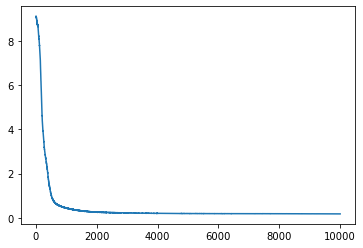

In [192]:
plt.plot(loss_hist)
100*metrics.acc_XOR(model.predict(X_train), y_train), 100*metrics.acc_XOR(model.predict(X_test), y_test)